In [61]:
import pandas as pd

from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

In [7]:
#train
df_train=pd.read_csv('newsgroups_train.csv')

In [8]:
df_train.head()

,text,target,category
0,From: degroff@netcom.com (21012d)\nSubject: Re...,2,sci.space
1,From: ab@nova.cc.purdue.edu (Allen B)\nSubject...,1,comp.graphics
2,From: healta@saturn.wwc.edu (Tammy R Healy)\nS...,0,alt.atheism
3,From: capelli@vnet.IBM.COM (Ron Capelli)\nSubj...,1,comp.graphics
4,From: henry@zoo.toronto.edu (Henry Spencer)\nS...,2,sci.space


In [9]:
df_train.shape

(1657, 3)

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1657 entries, 0 to 1656
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      1657 non-null   object
 1   target    1657 non-null   int64 
 2   category  1657 non-null   object
dtypes: int64(1), object(2)
memory usage: 39.0+ KB


In [10]:
df_train['target']

0       2
1       1
2       0
3       1
4       2
       ..
1652    1
1653    1
1654    2
1655    2
1656    2
Name: target, Length: 1657, dtype: int64

In [14]:
df_train['category'].value_counts()

category
sci.space        593
comp.graphics    584
alt.atheism      480
Name: count, dtype: int64

In [18]:
# prepare subset of category sci.space,comp.graphics ,alt.atheism 

categories = ['sci.space', 'comp.graphics', 'alt.atheism']
for cat in categories:
    filtered=df[df['category']==cat]
    print(filtered)

                                                   text  target   category
0     From: degroff@netcom.com (21012d)\nSubject: Re...       2  sci.space
4     From: henry@zoo.toronto.edu (Henry Spencer)\nS...       2  sci.space
5     From: dietz@cs.rochester.edu (Paul Dietz)\nSub...       2  sci.space
12    From: matthew@phantom.gatech.edu (Matthew DeLu...       2  sci.space
13    From: pgf@srl03.cacs.usl.edu (Phil G. Fraering...       2  sci.space
...                                                 ...     ...        ...
1648  From: gwh@soda.berkeley.edu (George William He...       2  sci.space
1649  From: 18084TM@msu.edu (Tom)\nSubject: Fred and...       2  sci.space
1654  From: xrcjd@resolve.gsfc.nasa.gov (Charles J. ...       2  sci.space
1655  From: dietz@cs.rochester.edu (Paul Dietz)\nSub...       2  sci.space
1656  From: jhwitten@cs.ruu.nl (Jurriaan Wittenberg)...       2  sci.space

[593 rows x 3 columns]
                                                   text  target       catego

In [28]:
df_train.isnull().sum()

text        0
target      0
category    0
dtype: int64

In [21]:
#test
df_test=pd.read_csv('newsgroups_test.csv')

In [23]:
df_test.head()

,text,target,category
0,From: mccall@mksol.dseg.ti.com (fred j mccall ...,2,sci.space
1,"From: ""Changyaw Wang"" <wangc@cs.indiana.edu>\n...",1,comp.graphics
2,From: lioness@maple.circa.ufl.edu\nSubject: Te...,1,comp.graphics
3,From: hotopp@ami1.bwi.wec.com (Daniel T. Hotop...,1,comp.graphics
4,From: Ad-Robot@bobsbox.rent.com (Robotic Posti...,1,comp.graphics


In [67]:
df_test['category'].value_counts()

category
sci.space        394
comp.graphics    389
alt.atheism      319
Name: count, dtype: int64

In [68]:
df_test.shape

(1102, 3)

In [69]:
df_test.isnull().sum()

text        0
target      0
category    0
dtype: int64

In [70]:
category=['alt.atheism']
for cat in category:
    filtered=df[df['category']==cat]
    print(filtered)

                                                   text  target     category
2     From: healta@saturn.wwc.edu (Tammy R Healy)\nS...       0  alt.atheism
6     From: cobb@alexia.lis.uiuc.edu (Mike Cobb)\nSu...       0  alt.atheism
7     From: edm@twisto.compaq.com (Ed McCreary)\nSub...       0  alt.atheism
8     From: dgraham@bmers30.bnr.ca (Douglas Graham)\...       0  alt.atheism
9     From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...       0  alt.atheism
...                                                 ...     ...          ...
1643  From: perry@dsinc.com (Jim Perry)\nSubject: Re...       0  alt.atheism
1645  From: jmunch@hertz.elee.calpoly.edu (John Munc...       0  alt.atheism
1646  From: bil@okcforum.osrhe.edu (Bill Conner)\nSu...       0  alt.atheism
1647  From: darice@yoyo.cc.monash.edu.au (Fred Rice)...       0  alt.atheism
1650  From: kempmp@phoenix.oulu.fi (Petri Pihko)\nSu...       0  alt.atheism

[480 rows x 3 columns]


In [100]:
# 13
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1200,stop_words='english')

In [101]:
train_num=cv.fit_transform(df_train['text'])

In [102]:
train_num=train_num.toarray()

In [103]:
train_num

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [104]:
x=train_num
y=df_train['target']

In [105]:
from sklearn.naive_bayes import BernoulliNB
model1=BernoulliNB()
model1.fit(x,y)

BernoulliNB()

In [134]:
#now test
test_num=cv.fit_transform(df_test['text'])
test_num=test_num.toarray()

In [107]:
test_num

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [108]:
y_pred=model1.predict(test_num)

In [109]:
y_pred[:5]

array([1, 1, 1, 1, 2])

In [110]:
y2=df_test['target']

In [111]:
acc=accuracy_score(y2,y_pred)

In [112]:
acc

0.44918330308529947

In [113]:
print(classification_report(y2,y_pred))

              precision    recall  f1-score   support

           0       0.49      0.13      0.21       319
           1       0.53      0.52      0.53       389
           2       0.39      0.63      0.49       394

    accuracy                           0.45      1102
   macro avg       0.47      0.43      0.41      1102
weighted avg       0.47      0.45      0.42      1102



In [114]:
cm=confusion_matrix(y2,y_pred)

In [115]:
cm

array([[ 42,  60, 217],
       [ 17, 203, 169],
       [ 27, 117, 250]])

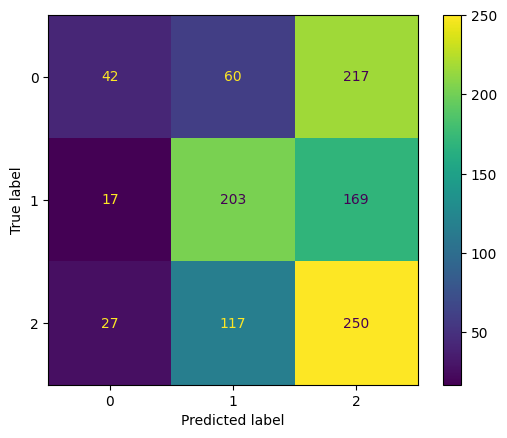

In [116]:
ConfusionMatrixDisplay(cm).plot()

In [119]:
#now tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

In [159]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)


In [160]:
#train
train_num2 = vectorizer.fit_transform(df_train['text'])
x = train_num2.toarray()
y = df_train['target']


In [161]:
#test
x_test = vectorizer.transform(df_test['text']).toarray()
y_test = df_test['target']


In [162]:
from sklearn.naive_bayes import MultinomialNB

In [163]:
model2 = MultinomialNB()
model2.fit(x, y)

y_pred = model2.predict(x_test)


In [164]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9555353901996371
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       319
           1       0.96      0.95      0.96       389
           2       0.93      0.97      0.95       394

    accuracy                           0.96      1102
   macro avg       0.96      0.95      0.96      1102
weighted avg       0.96      0.96      0.96      1102



In [165]:
cm=confusion_matrix(y_test,y_pred)

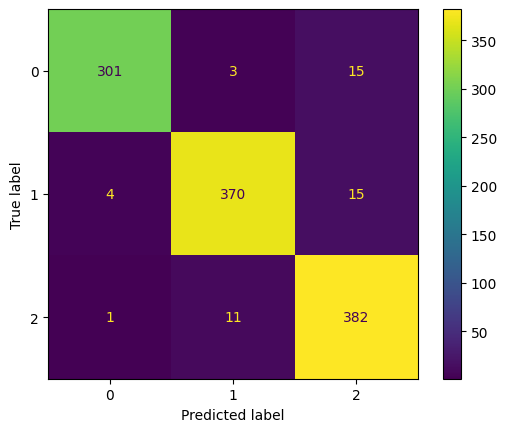

In [166]:
ConfusionMatrixDisplay(cm).plot()